# 2. Visualizing 

## In this notebook I will visualize the data we have after the cleaning. 

## Imports : 

In [1]:
import os 
import cv2
import numpy as np
import pandas as pd
import pickle
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
np.random.seed(42)

In [4]:
styles = os.listdir('/content/drive/MyDrive/DL/Project/my_data')
n_classes = (len(styles))
print(styles)
print(n_classes)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']
25


## Loading of the images : 
Here we will load the images into the appropriate format for working with them. However, please note that in the processing there wont be augmentation of the images as we will do later before training. This is because, right now we have need from all the information that they consist. Also, a rotation would increase the presence of pixels without any content. 

In [5]:
def loadImg(path, imgSize, classLable, classSize):
    img = cv2.imread(path)
    img = cv2.resize(img, imgSize)

    x.append(img)
    y.append(classLable)
    return x, y

In [6]:
# Constants :
size = 224
imgSize = (size, size)

In [7]:
paths = []
for i in range(len(styles)):
  paths.append('/content/drive/MyDrive/DL/Project/my_data/' + '{}'.format(styles[i]))

In [8]:
x = []
y = []


time_start = time.time()
for path in paths:
  list = os.listdir(path)
  lenght = len(list)
  for i in range(lenght):
    for style in styles:
      if style in path:
        try:
          img = '{}'.format(list[i])
          full_path = path +"/"+ img
          img = loadImg(full_path, imgSize, style, lenght)
        except Exception as e:
          continue
print('The images are pre-processed for: {} seconds'.format(time.time()-time_start))

The images are pre-processed for: 181.66365098953247 seconds


In [9]:
# Inserting the pixels in a dataframe: 
df = pd.DataFrame(y,columns=['styles'])

## First we are goign to check if the data is balanced : 

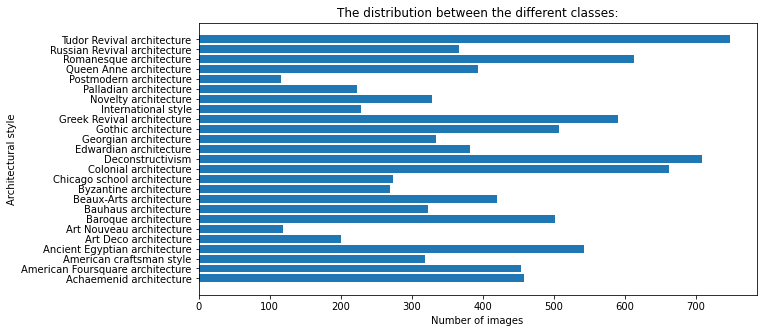

In [10]:
groups_by_num_images = df.groupby("styles").size()
plt.figure(figsize=(10,5))
plt.barh(groups_by_num_images.index, groups_by_num_images)
plt.title("The distribution between the different classes:")
plt.xlabel("Number of images")
plt.ylabel("Architectural style")
plt.savefig('/content/drive/MyDrive/DL/Project/bar_graph.png')
plt.show()

## Outcome : 
It is pretty evident that the data is not balanced. However, we will leave it like that for now. Later, I will try to train the model with this data, if its lerning is not good I will do oversampling. For now, I think this is not needed. Even if the learning is hard the oversampling could lead to overfiting on some classes for sure. The reason is that some architectural styles have little examples survived. If we want to increase their number that would mean to have the same example more than 100/200 times to reach the number of the other classes . 

### H1 - My hypothesis is that even with imbalanced data I will receive appropriate results .

Now we will proceed the data further in terms to visualize examples from different styles. 

In [11]:
for i in range(len(x)):
  x[i] = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)

In [12]:
for i in range(len(x)):
  x[i] = x[i].flatten()

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
print(x.shape, y.shape)

(10079, 50176) (10079,)


In [15]:
feat_cols = [ 'pixel'+str(i) for i in range(x.shape[1]) ]

In [16]:
df = pd.DataFrame(x,columns=feat_cols)
df['label'] = y

In [17]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

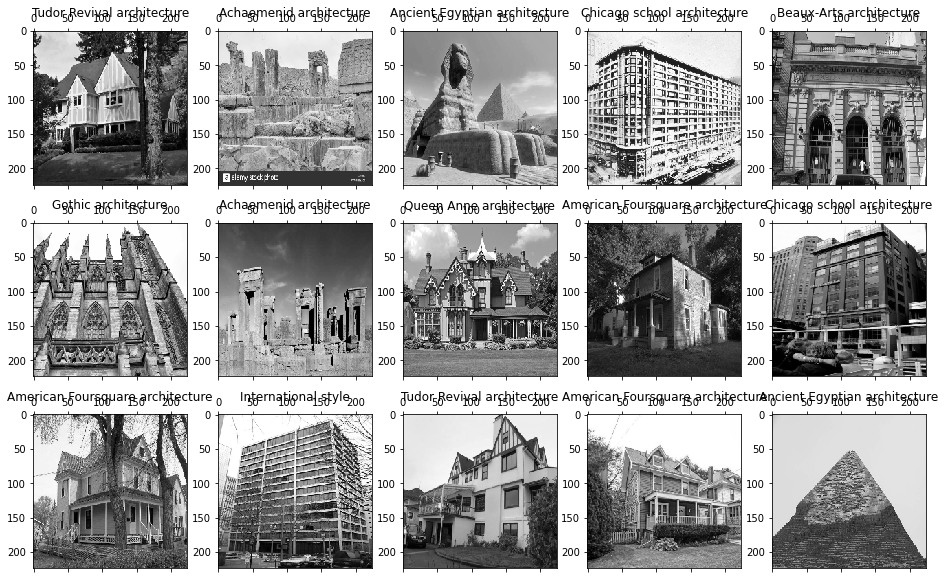

In [18]:
plt.gray()
fig = plt.figure( figsize=(16,10) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="{}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((224,224)).astype(float))
plt.show()

## Now we will continue with dimensionality reduction and tSNE for visualizing different patterns amongs the classes. The aim is to find if we can see differences between the styles before the learning. 

In [19]:
df = df.drop("label", axis = 1)

In [20]:
df2 = df[feat_cols].values

Before continuing we will scale the all data with mean of 0. 

In [21]:
scaler = StandardScaler()

In [22]:
df = pd.DataFrame(scaler.fit_transform(df2),columns = df.columns)

In [23]:
df["labels"] = y

In [24]:
styles = df.labels.unique()

I will separate the tSNE visualization in 5 different ones. This is because, we have so many classes and in that way it would be easier to investigate them . 

In [25]:
styles_1 = styles[0:5]
styles_2 = styles[5:10]
styles_3 = styles[10:15]
styles_4 = styles[15:20]
styles_5 = styles[20:25]

# First five styles : 

First of all, I am doing PCA, because in that way the work of the tSNE would be easier. 

In [103]:
first_five = df[df['labels'].isin(styles_1)]

In [104]:
first_five_values = first_five.drop("labels", axis = 1)

In [105]:
pca = KernelPCA(n_components=3, kernel="rbf")
pca_result = pca.fit_transform(first_five_values)

In [106]:
first_five['pca-one'] = pca_result[:,0]
first_five['pca-two'] = pca_result[:,1] 
first_five['pca-three'] = pca_result[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [107]:
explained_variance = np.var(pca_result, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_ratio)))

Explained variation per principal component: [0.44738708 0.80659684 1.        ]


In [109]:
pca_columns = first_five[['pca-one', 'pca-two', 'pca-three']]

In [110]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(pca_columns)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1974 samples in 0.002s...
[t-SNE] Computed neighbors for 1974 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1974
[t-SNE] Computed conditional probabilities for sample 1974 / 1974
[t-SNE] Mean sigma: 0.048845
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.712112
[t-SNE] KL divergence after 300 iterations: 1.256464
t-SNE done! Time elapsed: 3.893169403076172 seconds


In [111]:
first_five['tsne-2d-one'] = tsne_results[:,0]
first_five['tsne-2d-two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here we will get rid from the outliears/anomalies. Our data is already full of different construction, although from one architectural style . 

In [112]:
tsne_columns = first_five[['tsne-2d-two', 'tsne-2d-one']]

for column in tsne_columns:
  max_thresold = first_five[column].quantile(0.95)
  min_thresold = first_five[column].quantile(0.05)
  first_five = first_five[(first_five[column]<max_thresold) & (first_five[column]>min_thresold)]

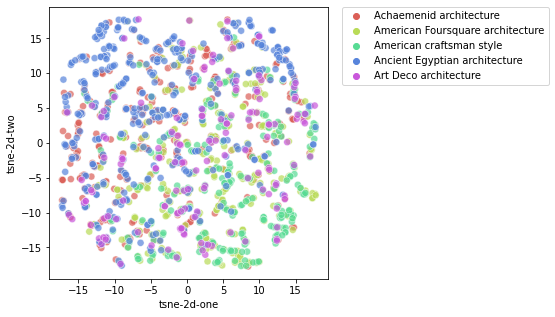

In [124]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 5),
    data=first_five,
    legend="full",
    s=50,
    alpha = 0.7
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/content/drive/MyDrive/DL/Project/first_five.png')
plt.show()

## Outcome : 
- The markers of Ancient Egyptian and Achemenid architecture seems to appear closer to each other than to the other styles. This is true, and we can see that in those examples of both styles : 
![Achemenid architecture](images/1.jpeg "Achemenid architecture")
![Ancient Egyptian architecture](images/2.jpg "Ancient Egyptian")

- On other side, the American styles are also similar. The reason is again pretty evident : 
![American Forthsquare](images/3.jpeg "American Forthsquare")
![America Craftsman](images/4.jpg "America Craftsman")

## We are going to do the same with all following styles . Some of the staks do not have evident differences. One one side this show us that this data is not easily separated, which mean it is not good for fiting a model. On another side, the reasult is understood bearing in mind that the task is very difficult and one architectural style could include a lot of different features in its own boundaries. However, we will proceed with the fiting and training, believing in the power of the Deep Learning algorithms and models. If the results are not satisfying we will proceed with deeper neural network . 

# Second five 

In [125]:
second_five = df[df['labels'].isin(styles_2)]

In [128]:
second_five_values = second_five.drop("labels", axis = 1)

In [129]:
pca = KernelPCA(n_components=3, kernel="rbf")
pca_result = pca.fit_transform(second_five_values)

In [130]:
second_five['pca-one'] = pca_result[:,0]
second_five['pca-two'] = pca_result[:,1] 
second_five['pca-three'] = pca_result[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [131]:
explained_variance = np.var(pca_result, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_ratio)))

Explained variation per principal component: [0.47340772 0.78561353 1.        ]


In [132]:
pca_columns = second_five[['pca-one', 'pca-two', 'pca-three']]

In [133]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(pca_columns)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1633 samples in 0.001s...
[t-SNE] Computed neighbors for 1633 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1633
[t-SNE] Computed conditional probabilities for sample 1633 / 1633
[t-SNE] Mean sigma: 0.047841
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.269287
[t-SNE] KL divergence after 300 iterations: 1.197116
t-SNE done! Time elapsed: 3.067084789276123 seconds


In [134]:
second_five['tsne-2d-one'] = tsne_results[:,0]
second_five['tsne-2d-two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
tsne_columns = second_five[['tsne-2d-two', 'tsne-2d-one']]

for column in tsne_columns:
  max_thresold = second_five[column].quantile(0.95)
  min_thresold = second_five[column].quantile(0.05)
  second_five = second_five[(second_five[column]<max_thresold) & (second_five[column]>min_thresold)]

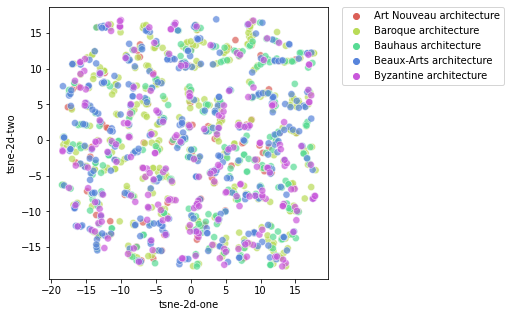

In [136]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 5),
    data=second_five,
    legend="full",
    s=50,
    alpha = 0.7
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/content/drive/MyDrive/DL/Project/second_five.png')
plt.show()

# Third five 

In [26]:
third_five = df[df['labels'].isin(styles_3)]

In [27]:
third_five_values = third_five.drop("labels", axis = 1)

In [28]:
pca = KernelPCA(n_components=3, kernel="rbf")
pca_result = pca.fit_transform(third_five_values)

In [29]:
third_five['pca-one'] = pca_result[:,0]
third_five['pca-two'] = pca_result[:,1] 
third_five['pca-three'] = pca_result[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [30]:
explained_variance = np.var(pca_result, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_ratio)))

Explained variation per principal component: [0.44897176 0.76420808 1.        ]


In [31]:
pca_columns = third_five[['pca-one', 'pca-two', 'pca-three']]

In [32]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(pca_columns)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2359 samples in 0.011s...
[t-SNE] Computed neighbors for 2359 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2359
[t-SNE] Computed conditional probabilities for sample 2000 / 2359
[t-SNE] Computed conditional probabilities for sample 2359 / 2359
[t-SNE] Mean sigma: 0.039527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.211525
[t-SNE] KL divergence after 300 iterations: 1.400698
t-SNE done! Time elapsed: 4.619614839553833 seconds


In [33]:
third_five['tsne-2d-one'] = tsne_results[:,0]
third_five['tsne-2d-two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
tsne_columns = third_five[['tsne-2d-two', 'tsne-2d-one']]

for column in tsne_columns:
  max_thresold = third_five[column].quantile(0.95)
  min_thresold = third_five[column].quantile(0.05)
  third_five = third_five[(third_five[column]<max_thresold) & (third_five[column]>min_thresold)]

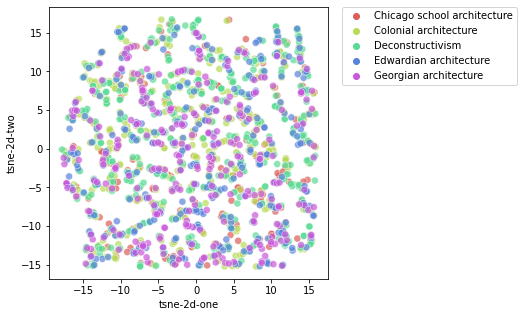

In [38]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 5),
    data=third_five,
    legend="full",
    s=50,
    alpha = 0.7
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/content/drive/MyDrive/DL/Project/third_five.png')
plt.show()

# Fourth five

In [39]:
fourth_five = df[df['labels'].isin(styles_4)]

In [40]:
fourth_five_values = fourth_five.drop("labels", axis = 1)

In [41]:
pca = KernelPCA(n_components=3, kernel="rbf")
pca_result = pca.fit_transform(fourth_five_values)

In [42]:
fourth_five['pca-one'] = pca_result[:,0]
fourth_five['pca-two'] = pca_result[:,1] 
fourth_five['pca-three'] = pca_result[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [43]:
explained_variance = np.var(pca_result, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_ratio)))

Explained variation per principal component: [0.49059387 0.77784849 1.        ]


In [44]:
pca_columns = fourth_five[['pca-one', 'pca-two', 'pca-three']]

In [45]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(pca_columns)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1877 samples in 0.002s...
[t-SNE] Computed neighbors for 1877 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1877
[t-SNE] Computed conditional probabilities for sample 1877 / 1877
[t-SNE] Mean sigma: 0.044579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.188324
[t-SNE] KL divergence after 300 iterations: 1.288245
t-SNE done! Time elapsed: 3.709908962249756 seconds


In [46]:
fourth_five['tsne-2d-one'] = tsne_results[:,0]
fourth_five['tsne-2d-two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
tsne_columns = fourth_five[['tsne-2d-two', 'tsne-2d-one']]

for column in tsne_columns:
  max_thresold = fourth_five[column].quantile(0.95)
  min_thresold = fourth_five[column].quantile(0.05)
  fourth_five = fourth_five[(fourth_five[column]<max_thresold) & (fourth_five[column]>min_thresold)]

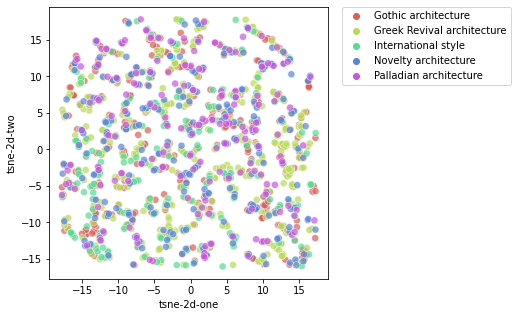

In [48]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 5),
    data=fourth_five,
    legend="full",
    s=50,
    alpha = 0.7
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/content/drive/MyDrive/DL/Project/fourth_five.png')
plt.show()

# Fifth five

In [26]:
fifth_five = df[df['labels'].isin(styles_5)]

In [27]:
fifth_five_values = fifth_five.drop("labels", axis = 1)

In [28]:
pca = KernelPCA(n_components=3, kernel="rbf")
pca_result = pca.fit_transform(fifth_five_values)

In [29]:
fifth_five['pca-one'] = pca_result[:,0]
fifth_five['pca-two'] = pca_result[:,1] 
fifth_five['pca-three'] = pca_result[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [30]:
explained_variance = np.var(pca_result, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_ratio)))

Explained variation per principal component: [0.47719867 0.76899157 1.        ]


In [31]:
pca_columns = fifth_five[['pca-one', 'pca-two', 'pca-three']]

In [32]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(pca_columns)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2236 samples in 0.008s...
[t-SNE] Computed neighbors for 2236 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2236
[t-SNE] Computed conditional probabilities for sample 2000 / 2236
[t-SNE] Computed conditional probabilities for sample 2236 / 2236
[t-SNE] Mean sigma: 0.040680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.559944
[t-SNE] KL divergence after 300 iterations: 1.375516
t-SNE done! Time elapsed: 4.730773210525513 seconds


In [33]:
fifth_five['tsne-2d-one'] = tsne_results[:,0]
fifth_five['tsne-2d-two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
tsne_columns = fifth_five[['tsne-2d-two', 'tsne-2d-one']]

for column in tsne_columns:
  max_thresold = fifth_five[column].quantile(0.95)
  min_thresold = fifth_five[column].quantile(0.05)
  fifth_five = fifth_five[(fifth_five[column]<max_thresold) & (fifth_five[column]>min_thresold)]

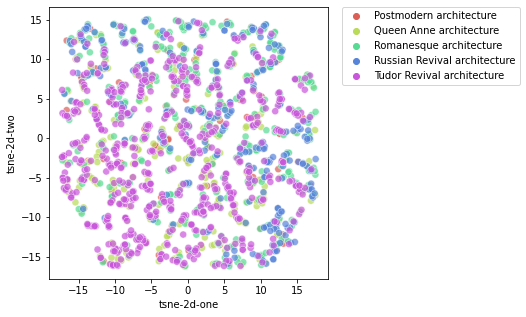

In [35]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 5),
    data=fifth_five,
    legend="full",
    s=50,
    alpha = 0.7
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/content/drive/MyDrive/DL/Project/fifth_five.png')
plt.show()

## Finally, the difference between Russian Revival and Tudor architecture is easily noted as can be seen from the real life : 
![Russian Revival](images/5.jpeg "Russian Revival")
![Tudor architecture](images/6.jpeg "Tudor architecture")

# The final Outcome : 

### It would be very difficult to train a model to recognize all different characters. The same time it would be very difficult to prevent the overfiting. However, with deeper neural network, augmented photos, regulization and dropout layers we can reach an appropriate result. Let's try it with ResNet and Inception in the next notebooks. 